## Spectral (color) vector quantization

In [1]:
from IPython.display import Image, display

In [2]:
!rm /tmp/encoded*
%run download_default_image.ipynb

rm: no se puede borrar '/tmp/encoded*': No existe el archivo o el directorio


ModuleNotFoundError: No module named 'nbformat'

In [3]:
!python ../src/color-VQ.py encode -h

usage: color-VQ.py encode [-h] [-q N_COLOR_CLUSTERS]

options:
  -h, --help            show this help message and exit
  -q, --N_color_clusters N_COLOR_CLUSTERS
                        Number of clusters (default: 32)


In [4]:
%%bash
python ../src/color-VQ.py encode

(INFO) color-VQ: quantizing ...
(INFO) color-VQ: Determining centroids ...
(INFO) color-VQ: compressing ...
(INFO) entropy_image_coding: Written 51429 bytes in /tmp/encoded.tif


main Namespace(debug=False, subparser_name='encode', N_color_clusters=32, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f51fd774360>)


In [5]:
!python ../src/color-VQ.py decode -h

usage: color-VQ.py decode [-h] [-q N_COLOR_CLUSTERS] [-f FILTER]

options:
  -h, --help            show this help message and exit
  -q, --N_color_clusters N_COLOR_CLUSTERS
                        Number of clusters (default: 32)
  -f, --filter FILTER   Denoising filter (default: no_filter)


In [6]:
%%bash
python ../src/color-VQ.py decode

(INFO) color-VQ: Dequantizing ...


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', N_color_clusters=32, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f108982d800>)


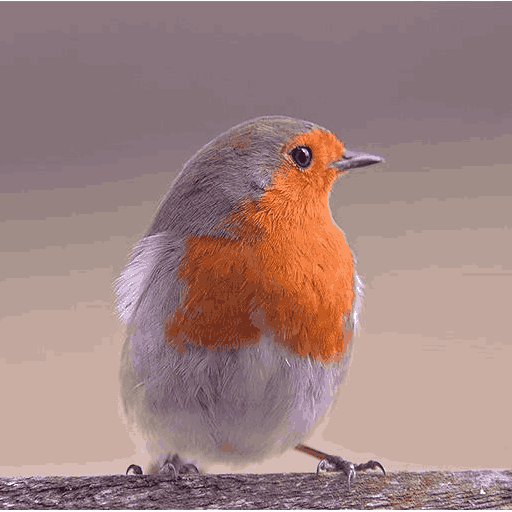

In [7]:
display(Image(filename="/tmp/decoded.png"))

In [8]:
!python ../src/RDE.py

Code-stream file: /tmp/encoded_centroids.npz length: 300
Code-stream file: /tmp/encoded.tif length: 51429
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded_centroids.npz', '/tmp/encoded.tif'] 51729 bytes (1.58) bits/pixel
Decoded image: /tmp/decoded.png 96401 bytes (2.94) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 5.17
J = R + D = 6.74


### Controlling the number of colors

main Namespace(debug=False, subparser_name='encode', N_color_clusters=16, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f8691394360>)
(INFO) color-VQ: quantizing ...
(INFO) color-VQ: Determining centroids ...
(INFO) color-VQ: compressing ...
(INFO) entropy_image_coding: Written 38029 bytes in /tmp/encoded.tif
Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', N_color_clusters=16, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7ffa914b5800>)
(INFO) color-VQ: Dequantizing ...


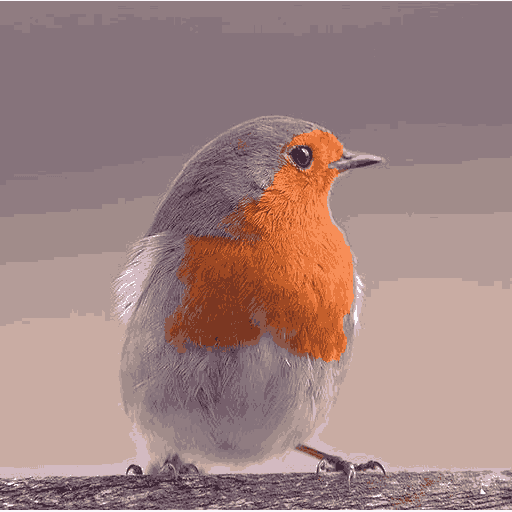

Code-stream file: /tmp/encoded_centroids.npz length: 249
Code-stream file: /tmp/encoded.tif length: 38029
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded_centroids.npz', '/tmp/encoded.tif'] 38278 bytes (1.17) bits/pixel
Decoded image: /tmp/decoded.png 62772 bytes (1.92) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 7.06
J = R + D = 8.23


In [9]:
!rm /tmp/encoded*
!python ../src/color-VQ.py encode -q 16
!python ../src/color-VQ.py decode -q 16
display(Image(filename="/tmp/decoded.png"))
!python ../src/RDE.py

### Blurring the output

main Namespace(debug=False, subparser_name='encode', N_color_clusters=16, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x7f80d1fac360>)
(INFO) color-VQ: quantizing ...
(INFO) color-VQ: Determining centroids ...
(INFO) color-VQ: compressing ...
(INFO) entropy_image_coding: Written 36121 bytes in /tmp/encoded.tif
Denoising filter = gaussian_blur
main Namespace(debug=False, subparser_name='decode', N_color_clusters=16, filter='gaussian_blur', filter_size=5, entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7f7095b09800>)
(INFO) color-VQ: Dequantizing ...
(INFO) gaussian_blur: filter size=5


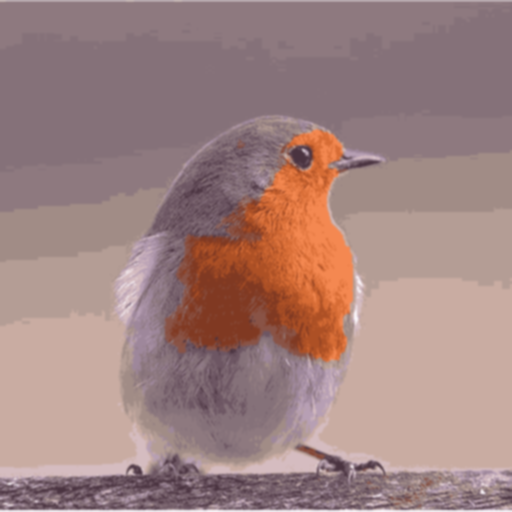

Code-stream file: /tmp/encoded_centroids.npz length: 250
Code-stream file: /tmp/encoded.tif length: 36121
Original image: /tmp/original.png 215071 bytes (6.56) bits/pixel
Code-stream: ['/tmp/encoded_centroids.npz', '/tmp/encoded.tif'] 36371 bytes (1.11) bits/pixel
Decoded image: /tmp/decoded.png 134137 bytes (4.09) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 10.72
J = R + D = 11.83


In [10]:
!rm /tmp/encoded*
!python ../src/color-VQ.py encode -q 16
!python ../src/color-VQ.py decode -q 16 -f gaussian_blur -s 5
display(Image(filename="/tmp/decoded.png"))
!python ../src/RDE.py